In [1]:
from IGA import IGA2D
import IGA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
knot_vector1 = [0, 0, 1, 2, 3, 3]
knot_vector2 = [0, 0, 1, 2, 2]

control_points = np.array([[[0,0],[1,0],[2,0],[3,0]],[[0,1],[1,1],[2,1],[3,1]],[[0,2],[1,2],[2,2],[3,2]]], dtype=np.double)

weights = np.ones_like(control_points[:,:,0])

iga = IGA2D(knot_vector1, 1, knot_vector2, 1, control_points, weights)

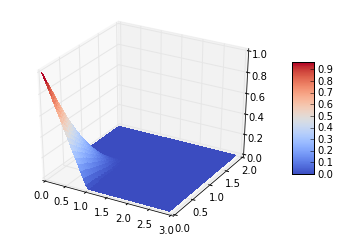

In [3]:
from IPython.html.widgets import interact, fixed

interact(iga.R.plot, shape_function_number={str(i):i for i in range(iga.num_of_global_basis_functions)}, derivative=fixed(None));

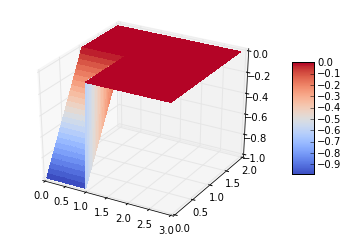

In [4]:
interact(iga.R.plot, shape_function_number={str(i):i for i in range(iga.num_of_global_basis_functions)}, derivative=['xi','eta']);

In [5]:
#Create a boundary condition node set and vaules for the top side
ns1 = np.array([8, 9, 10, 11], dtype=np.int64)
val1 = np.cos(np.pi * np.array([0., 1., 2., 3.]) / 6.) * 100

#Create a boundary condition node set for the right side
ns2 = np.array([3, 7, 11], dtype=np.int64)
val2 = np.zeros(len(ns2))

#Assemble
iga.assemble()
#Apply boundary conditions
iga.apply_bcs(ns1,val1)
iga.apply_bcs(ns2,val2)
#Solve
iga.solve()
iga.get_solution()

array([  61.28417886,   53.07365574,   30.64208943,    0.        ,
         70.29995898,   60.88155036,   35.14997949,    0.        ,
        100.        ,   86.60254038,   50.        ,    0.        ])

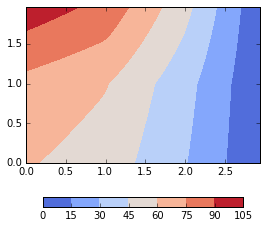

In [6]:
iga.plot_solution()

In [7]:
def evaluate_physical_coordinates(xi, col_pt=(0.0,0.0)):
    
    basis = iga.R(np.array([xi[0]]), np.array([xi[1]]))
    
    x = (np.einsum('...ij,ij', basis, iga.x.reshape(basis.shape[1:])) - col_pt[0]).flatten()
    y = (np.einsum('...ij,ij', basis, iga.y.reshape(basis.shape[1:])) - col_pt[1]).flatten()
       
    return np.array([x[0], y[0]])

In [8]:
N = IGA.Bspline(knot_vector1, 1)

In [12]:
N(np.array([0.0]))

array([[ 1.,  0.,  0.,  0.]])

In [10]:
xi=np.array([0.0,2.8,3.0])

cond1 = xi[:, None] == knot_vector1[1:]
cond2 = np.array(knot_vector1[:-1]) <=  xi[:, None]
cond3 = xi[:, None] < np.array(knot_vector1[1:]) 

np.where(cond1, 1.0, np.where(cond2 & cond3, 1.0, 0.0))

array([[ 1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.]])

In [11]:
knot_vector1[:-1] - xi[:, None] < (knot_vector1[1:] - knot_vector1[:-1])[:,None]

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
(np.array(knot_vector1[1:]) - np.array(knot_vector1[:-1]))

In [ ]:
cond2 = xi[:, None] - knot_vector1[:-1] <= (np.array(knot_vector1[1:]) - np.array(knot_vector1[:-1])) 

In [ ]:
cond1 & cond2

In [ ]:
np.where( cond1 )

In [ ]:
np.searchsorted(knot_vector1, xi)

In [ ]:
knot_vector1

In [ ]:
filter(lambda x: if knot_vector[1:] <= )